# try to check our modules and models and construct first pipeline

In [1]:
import sys
sys.path.append('../models/')

from ipywidgets import interact
from hbv_s import interaction
%matplotlib inline

In [2]:
river_name = 'Pur River'
path_to_scheme = '../data/pur_scheme.csv'
path_to_observations = '../data/pur_observations.csv'

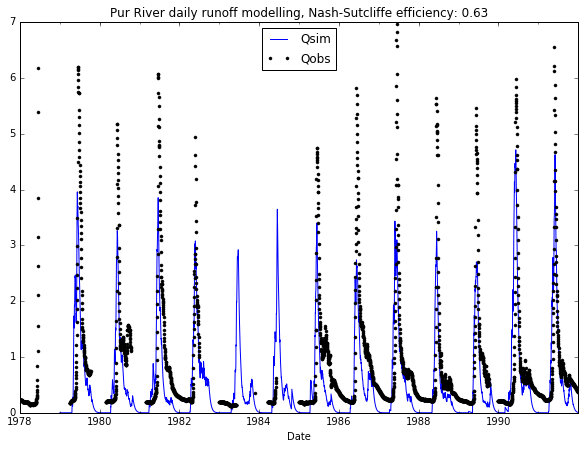

In [3]:
# interact with new PE module
interact(interaction, 
         river_name=river_name, 
         path_to_scheme=path_to_scheme, 
         path_to_observations=path_to_observations,
         beta=(1,5,0.5), fc=(50,500,10), Tt=(-2.9,0), gd=(0.5,4), k=(0.4,1.6), 
         k0=(0.01,0.1,0.005), k1=(0.01,0.1,0.005), Tk1=(0.9,1.1,0.05), Tk2=(0.9,1.1,0.05), __manual=True)

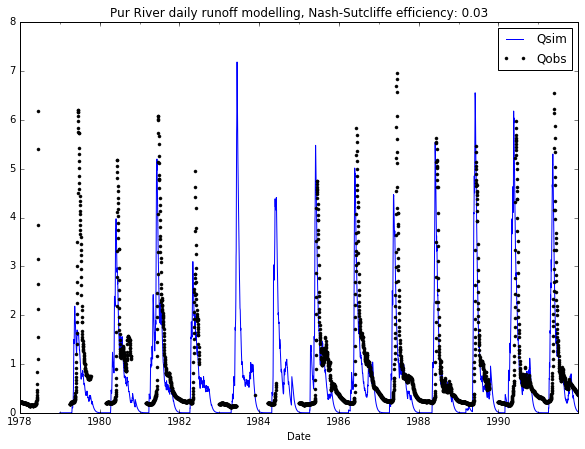

In [3]:
# this is the old version of "interaction" with monthly values of evaporation
interact(interaction, 
         river_name=river_name, 
         path_to_scheme=path_to_scheme, 
         path_to_observations=path_to_observations,
         beta=(1,5,0.5), fc=(50,500,10), Tt=(-2.9,0), gd=(0.5,4), k=(0.4,1.6), 
         k0=(0.01,0.1,0.005), k1=(0.01,0.1,0.005), Tk1=(0.9,1.1,0.05), Tk2=(0.9,1.1,0.05), __manual=True)

In [ ]:
def hbv_s_interaction(beta=(1,5,0.5), fc=(50,500), Tt=(-2.9,0), gd=(0.5,4), k=(0.4,1.6), 
             k0=(0.01,0.1,0.005), k1=(0.01,0.1,0.005), Tk1=(0.9,1.1,0.05), Tk2=(0.9,1.1,0.05)):
    
    # simulate our modeled hydrograph
    data = dataframe_construction(path_to_scheme)
    data['Qsim'] = hbv_s.simulation(data, [beta, fc, Tt, gd, k, k0, k1, Tk1, Tk2])
    
    # read observations
    obs = pd.read_csv(path_to_observations, index_col=0, parse_dates=True, 
                      squeeze=True, header=None, names=['Date', 'Qobs'])
    
    # concatenate data 
    data = pd.concat([data, obs], axis=1)
       
    # calculate efficiency criterion
    # slice data only for observational period and drop NA values
    data_for_obs = data.ix[obs.index, ['Qsim', 'Qobs']].dropna()
    eff = NS(data_for_obs['Qobs'], data_for_obs['Qsim'])  
    
    # plot
    ax = data.ix[obs.index, ['Qsim', 'Qobs']].plot(figsize=(10, 7), style=['b-', 'k.'])
    ax.set_title(river_name + ' daily runoff modelling')
    text_pos = np.max(data['Qobs'])
    ax.text(obs.index[100], text_pos, 'NS: {}'.format(np.round(eff, 2)), size=14)

In [ ]:
interact(hbv_s_interaction, __manual=True)

In [ ]:
from ipywidgets import interact
@interact
def hbv_s_interaction(beta=(1,5,0.5), fc=(50,500), Tt=(-2.9,0), gd=(0.5,4), k=(0.4,1.6), 
             k0=(0.01,0.1,0.005), k1=(0.01,0.1,0.005), Tk1=(0.9,1.1,0.05), Tk2=(0.9,1.1,0.05)):
    
    # simulate our modeled hydrograph
    data = dataframe_construction(path_to_scheme)
    data['Qsim'] = hbv_s.simulation(data, [beta, fc, Tt, gd, k, k0, k1, Tk1, Tk2])
    
    # read observations
    obs = pd.read_csv(path_to_observations, index_col=0, parse_dates=True, 
                      squeeze=True, header=None, names=['Date', 'Qobs'])
    
    # concatenate data 
    data = pd.concat([data, obs], axis=1)
       
    # calculate efficiency criterion
    # slice data only for observational period and drop NA values
    data_for_obs = data.ix[obs.index, ['Qsim', 'Qobs']].dropna()
    eff = NS(data_for_obs['Qobs'], data_for_obs['Qsim'])  
    
    # plot
    
    ax = data.ix[obs.index, ['Qsim', 'Qobs']].plot(figsize=(10, 7), style=['b-', 'k.'])
    ax.set_title(river_name + ' daily runoff modelling')
    ax.text(obs.index[100], np.max(data['Qsim']), 'NS: {}'.format(np.round(eff, 2)), size=14)